In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from PIL import Image
from nibabel.testing import data_path
import os
import sys
%matplotlib inline
import plotly.express as px

In [2]:
from scipy.stats import rice
from scipy.optimize import leastsq

In [3]:
import random
def noisyMagnitudeData(signalMag, noiseSTD):
    # Add rician noise to data.
    
    realSig = signalMag + random.randrange(10) * noiseSTD
    imagSig = 0         + random.randrange(10) * noiseSTD

    return np.sqrt(realSig*realSig + imagSig*imagSig)

In [4]:
def residual(variables, x, data, eps_data):
    """Model a decaying sine wave and subtract data."""
    T1 = variables[0]

    model = ((1-np.exp(-15/T1))/(1-np.cos(np.deg2rad(x))*np.exp(-15/T1)))*np.sin(np.deg2rad(x))

    return (data-model) / eps_data

In [5]:
def lineaire(variables, x, data, eps_data):
    """Model a decaying sine wave and subtract data."""
    T1 = variables[0]

    model = T1*x

    return (data-model) / eps_data

In [6]:
TF=15
T1 = 1600
SNR = 100
xdata = np.arange(1, 30, 1)
ydata = np.zeros(xdata.size)
ydata_rice = np.zeros(xdata.size)
for i in range (0, xdata.size):
    ydata[i] = ((1-np.exp(-TF/T1))/(1-np.cos(np.deg2rad(xdata[i]))*np.exp(-TF/T1)))*np.sin(np.deg2rad(xdata[i]))
#for i in range (0, xdata.size):
    #ydata_rice[i] = ydata[i] + ((rice.rvs(b, size =1)-1)/SNR)
print(xdata.size)

29


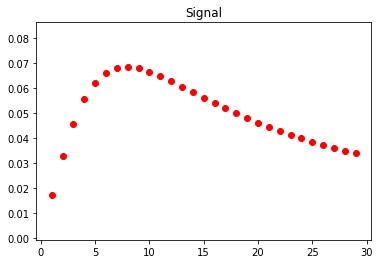

In [7]:
plt.title('Signal')
plt.scatter(xdata, ydata,c='r')

In [8]:
eps_data =1
variables = [1000]
out = leastsq(residual, variables, args=(xdata, ydata, eps_data))[0]
print(out)

[1600.]


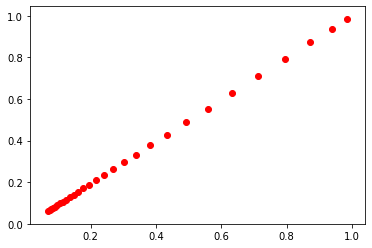

In [9]:
xdata_lin = np.zeros(xdata.size)
ydata_lin = np.zeros(xdata.size)
for i in range (0, xdata.size):
    ydata_lin[i]=ydata[i]/(np.tan(np.deg2rad(xdata[i])))
    xdata_lin[i]=ydata[i]/(np.sin(np.deg2rad(xdata[i])))
    #T1 = -TF/(np.log(pente)) 
    #print(T1)
plt.scatter(xdata_lin, ydata_lin,c='r')

In [54]:
eps_data =1
variables = [1000]
out = leastsq(lineaire, variables, args=(xdata_lin, ydata_lin, eps_data))[0]
#print(out)
print(-TF/np.log(out))

[200.57933977]


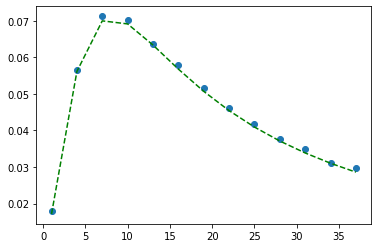

In [309]:
TF=15
T1 = 1500
SNR = 500
xdata = xdata = np.arange(1, 40, 3)
ydata = np.zeros(xdata.size)
ydata_rice = np.zeros(xdata.size)
for i in range (0, xdata.size):
    ydata[i] = ((1-np.exp(-TF/T1))/(1-np.cos(np.deg2rad(xdata[i]))*np.exp(-TF/T1)))*np.sin(np.deg2rad(xdata[i]))#+bruit[i]/1000
for i in range (0, xdata.size):
    ydata_rice[i] = noisyMagnitudeData(ydata[i], np.max(ydata)/SNR)
#plt.scatter(xdata, ydata_rice,c='r')
#plt.errorbar(xdata_lin, ydata_lin, c='b')
plt.plot(xdata, ydata_rice, 'o',xdata, ydata, 'g--')

In [310]:
eps_data =1
variables = [1000]
T1_non_lin = leastsq(residual, variables, args=(xdata, ydata_rice, eps_data))[0]
print(T1_non_lin)
print(((T1_non_lin-T1)/T1)*100)

[1467.68196483]
[-2.15453568]


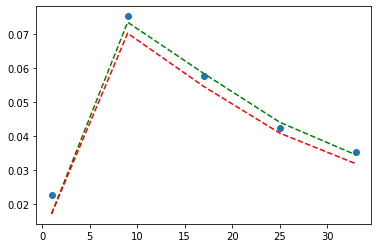

In [75]:
y_courbe = np.zeros(xdata.size)
for i in range (0, xdata.size):
    y_courbe[i] = ((1-np.exp(-TF/T1_non_lin))/(1-np.cos(np.deg2rad(xdata[i]))*np.exp(-TF/T1_non_lin)))*np.sin(np.deg2rad(xdata[i]))
plt.plot(xdata, ydata_rice, 'o',xdata, y_courbe, 'g--', xdata, ydata, 'r--')

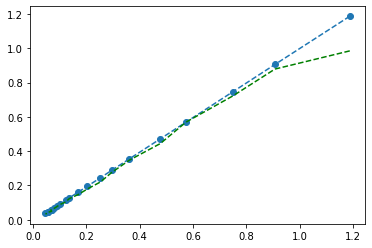

In [57]:
xdata_lin = np.zeros(xdata.size)
ydata_lin = np.zeros(xdata.size)
ydata_lin_rice = np.zeros(xdata.size)
for i in range (0, xdata.size):
    ydata_lin[i]=ydata[i]/(np.tan(np.deg2rad(xdata[i])))
    ydata_lin_rice[i]=ydata_rice[i]/(np.tan(np.deg2rad(xdata[i])))
    xdata_lin[i]=ydata_rice[i]/(np.sin(np.deg2rad(xdata[i])))
    #T1 = -TF/(np.log(pente)) 
    #print(T1)
#plt.scatter(xdata_lin, ydata_lin,c='r')
#plt.errorbar(xdata_lin, ydata_lin, yerr = 0.1, c='b')
plt.plot(xdata_lin, ydata_lin_rice, 'o--', xdata_lin, ydata_lin, 'g--')

[2078.29455491]


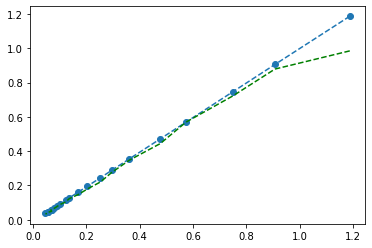

In [68]:
eps_data =1
variables = [1000]
out = leastsq(lineaire, variables, args=(xdata_lin, ydata_lin_rice, eps_data))[0]
#print(out)
print(-TF/np.log(out))
plt.plot(xdata_lin, ydata_lin_rice, 'o--', xdata_lin, ydata_lin, 'g--', xdata_lin, )

In [53]:
#pente = np.zeros(xdata.size)
#for i in range (0, xdata.size):
#    pente[i]=ydata_lin_rice[i]/xdata_lin[i]
#print(-TF/np.log(np.mean(pente)))